In [102]:
import pandas as pd
import re
from datetime import datetime
import matplotlib.pyplot as plt

file_path = r"C:\Users\Thavamani\Downloads\calgary_access_log_final"

pattern = re.compile(r'(\S+) - - \[(.*?)\] "(.*?) (.*?) (.*?)" (\d{3}) (\S+)')

data = []

with open(file_path,encoding='utf-8', errors='ignore') as f:
    for line in f:
        match = pattern.match(line)
        if match:
            host, datetime_str, method, resource, protocol, status, size = match.groups()
            date = datetime.strptime(datetime_str.split()[0], '%d/%b/%Y:%H:%M:%S')
            size = int(size) if size.isdigit() else None
            data.append([host, date, method, resource, protocol, int(status), size])

df = pd.DataFrame(data, columns=['host', 'date', 'method', 'resource', 'protocol', 'status', 'size'])

print(df.head())


    host                date method    resource  protocol  status     size
0  local 1994-10-24 13:41:41    GET  index.html  HTTP/1.0     200    150.0
1  local 1994-10-24 13:41:41    GET       1.gif  HTTP/1.0     200   1210.0
2  local 1994-10-24 13:43:13    GET  index.html  HTTP/1.0     200   3185.0
3  local 1994-10-24 13:43:14    GET       2.gif  HTTP/1.0     200   2555.0
4  local 1994-10-24 13:43:15    GET       3.gif  HTTP/1.0     200  36403.0


In [103]:
df

,host,date,method,resource,protocol,status,size
0,local,1994-10-24 13:41:41,GET,index.html,HTTP/1.0,200,150.0
1,local,1994-10-24 13:41:41,GET,1.gif,HTTP/1.0,200,1210.0
2,local,1994-10-24 13:43:13,GET,index.html,HTTP/1.0,200,3185.0
3,local,1994-10-24 13:43:14,GET,2.gif,HTTP/1.0,200,2555.0
4,local,1994-10-24 13:43:15,GET,3.gif,HTTP/1.0,200,36403.0
...,...,...,...,...,...,...,...
723995,local,1995-10-11 14:11:39,GET,2.gif,HTTP/1.0,200,2555.0
723996,local,1995-10-11 14:11:40,GET,3.gif,HTTP/1.0,200,36403.0
723997,local,1995-10-11 14:11:45,GET,11459.html,HTTP/1.0,404,NaN
723998,local,1995-10-11 14:11:58,GET,11459.html,HTTP/1.0,404,NaN


In [104]:
print(df.dtypes)


host                object
date        datetime64[ns]
method              object
resource            object
protocol            object
status               int64
size               float64
dtype: object


In [105]:

df = pd.DataFrame(data, columns=['host', 'date', 'method', 'resource', 'protocol', 'status', 'size'])

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('string')

df = df.astype({
    'host': 'string',
    'date': 'datetime64[ns]',
    'method': 'string',
    'resource': 'string',
    'protocol': 'string',
    'status': 'int32',
    'size': 'Int64'  
})


print("\nDataFrame column data types:")
print(df.dtypes)


print("\nFirst five rows of the DataFrame:")
print(df.head())



DataFrame column data types:
host        string[python]
date        datetime64[ns]
method      string[python]
resource    string[python]
protocol    string[python]
status               int32
size                 Int64
dtype: object

First five rows of the DataFrame:
    host                date method    resource  protocol  status   size
0  local 1994-10-24 13:41:41    GET  index.html  HTTP/1.0     200    150
1  local 1994-10-24 13:41:41    GET       1.gif  HTTP/1.0     200   1210
2  local 1994-10-24 13:43:13    GET  index.html  HTTP/1.0     200   3185
3  local 1994-10-24 13:43:14    GET       2.gif  HTTP/1.0     200   2555
4  local 1994-10-24 13:43:15    GET       3.gif  HTTP/1.0     200  36403


In [106]:
df.tail()

,host,date,method,resource,protocol,status,size
723995,local,1995-10-11 14:11:39,GET,2.gif,HTTP/1.0,200,2555
723996,local,1995-10-11 14:11:40,GET,3.gif,HTTP/1.0,200,36403
723997,local,1995-10-11 14:11:45,GET,11459.html,HTTP/1.0,404,<NA>
723998,local,1995-10-11 14:11:58,GET,11459.html,HTTP/1.0,404,<NA>
723999,local,1995-10-11 14:14:17,GET,index.html,HTTP/1.0,304,0


In [107]:
df['size'] = df['size'].fillna(0)


In [108]:
df.tail()

,host,date,method,resource,protocol,status,size
723995,local,1995-10-11 14:11:39,GET,2.gif,HTTP/1.0,200,2555
723996,local,1995-10-11 14:11:40,GET,3.gif,HTTP/1.0,200,36403
723997,local,1995-10-11 14:11:45,GET,11459.html,HTTP/1.0,404,0
723998,local,1995-10-11 14:11:58,GET,11459.html,HTTP/1.0,404,0
723999,local,1995-10-11 14:14:17,GET,index.html,HTTP/1.0,304,0


In [109]:
df.head()

,host,date,method,resource,protocol,status,size
0,local,1994-10-24 13:41:41,GET,index.html,HTTP/1.0,200,150
1,local,1994-10-24 13:41:41,GET,1.gif,HTTP/1.0,200,1210
2,local,1994-10-24 13:43:13,GET,index.html,HTTP/1.0,200,3185
3,local,1994-10-24 13:43:14,GET,2.gif,HTTP/1.0,200,2555
4,local,1994-10-24 13:43:15,GET,3.gif,HTTP/1.0,200,36403


# Q1: Count of total log records

In [110]:
http_df = df[df['protocol'].str.contains('http', case=False, na=False)]
count_http = len(http_df)
print("Number of HTTP protocol records:", count_http)


Number of HTTP protocol records: 723261


# Q2: Count of unique hosts

In [111]:
host_counts = df['host'].value_counts()
print(host_counts)


host
local     373174
remote    350826
Name: count, dtype: Int64


In [112]:
host_counts_df = host_counts.reset_index()
host_counts_df.columns = ['host', 'count']
print(host_counts_df)


     host   count
0   local  373174
1  remote  350826


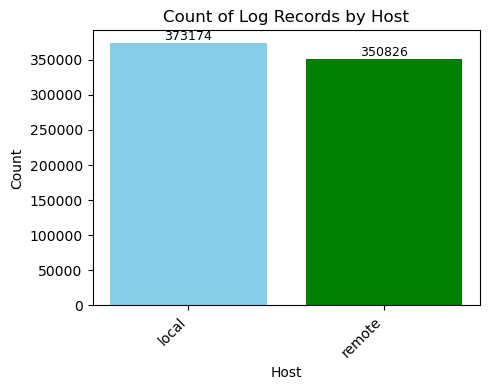

In [113]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
bars = plt.bar(host_counts_df['host'], host_counts_df['count'], color=['skyblue', 'green'])
plt.title('Count of Log Records by Host')
plt.xlabel('Host')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        height,                             
        f'{height}',                        
        ha='center', va='bottom', fontsize=9  
    )

plt.tight_layout()
plt.show()


# 3 Date-wise unique filename counts

In [114]:
df['date_only'] = df['date'].dt.strftime('%d-%m-%Y')


In [115]:
df

,host,date,method,resource,protocol,status,size,date_only
0,local,1994-10-24 13:41:41,GET,index.html,HTTP/1.0,200,150,24-10-1994
1,local,1994-10-24 13:41:41,GET,1.gif,HTTP/1.0,200,1210,24-10-1994
2,local,1994-10-24 13:43:13,GET,index.html,HTTP/1.0,200,3185,24-10-1994
3,local,1994-10-24 13:43:14,GET,2.gif,HTTP/1.0,200,2555,24-10-1994
4,local,1994-10-24 13:43:15,GET,3.gif,HTTP/1.0,200,36403,24-10-1994
...,...,...,...,...,...,...,...,...
723995,local,1995-10-11 14:11:39,GET,2.gif,HTTP/1.0,200,2555,11-10-1995
723996,local,1995-10-11 14:11:40,GET,3.gif,HTTP/1.0,200,36403,11-10-1995
723997,local,1995-10-11 14:11:45,GET,11459.html,HTTP/1.0,404,0,11-10-1995
723998,local,1995-10-11 14:11:58,GET,11459.html,HTTP/1.0,404,0,11-10-1995


In [184]:

grouped_counts = df.groupby(['date_only', 'resource']).size().reset_index(name='count')

print(grouped_counts)


         date_only    resource  count
0       01-01-1995   1082.html      3
1       01-01-1995   1095.html      1
2       01-01-1995    1097.gif      3
3       01-01-1995    1098.gif      3
4       01-01-1995    1099.gif      3
...            ...         ...    ...
174837  31-12-1994      957.ps      1
174838  31-12-1994    989.html      3
174839  31-12-1994    990.html      3
174840  31-12-1994    991.html      2
174841  31-12-1994  index.html     91

[174842 rows x 3 columns]


In [188]:
pd.set_option('display.max_rows', 1000) 
print(grouped_counts)


         date_only    resource  count
0       01-01-1995   1082.html      3
1       01-01-1995   1095.html      1
2       01-01-1995    1097.gif      3
3       01-01-1995    1098.gif      3
4       01-01-1995    1099.gif      3
...            ...         ...    ...
174837  31-12-1994      957.ps      1
174838  31-12-1994    989.html      3
174839  31-12-1994    990.html      3
174840  31-12-1994    991.html      2
174841  31-12-1994  index.html     91

[174842 rows x 3 columns]


# Q4: Number of 404 response codes

In [119]:
num_404 = (df['status'] == 404).sum()
print(num_404)


23531


# Q5: Top 15 filenames with 404 responses

In [191]:
top_404_files = (
    df[df['status'] == 404]              
    .groupby('resource')                 
    .size()                              
    .sort_values(ascending=False)        
    .head(16)                            
    .reset_index(name='count')           
)


result = list(top_404_files.itertuples(index=False, name=None))
print(result)


[('index.html', 4737), ('4115.html', 902), ('1611.html', 649), ('5698.xbm', 585), ('710.txt', 408), ('2002.html', 259), ('2177.gif', 193), ('10695.ps', 161), ('6555.html', 153), ('487.gif', 152), ('151.html', 149), ('40.html', 148), ('3414.gif', 148), ('488.gif', 148), ('9678.gif', 142), ('3268.gif', 138)]


In [194]:
result_df = top_404_files


print(result_df)

      resource  count
0   index.html   4737
1    4115.html    902
2    1611.html    649
3     5698.xbm    585
4      710.txt    408
5    2002.html    259
6     2177.gif    193
7     10695.ps    161
8    6555.html    153
9      487.gif    152
10    151.html    149
11     40.html    148
12    3414.gif    148
13     488.gif    148
14    9678.gif    142
15    3268.gif    138


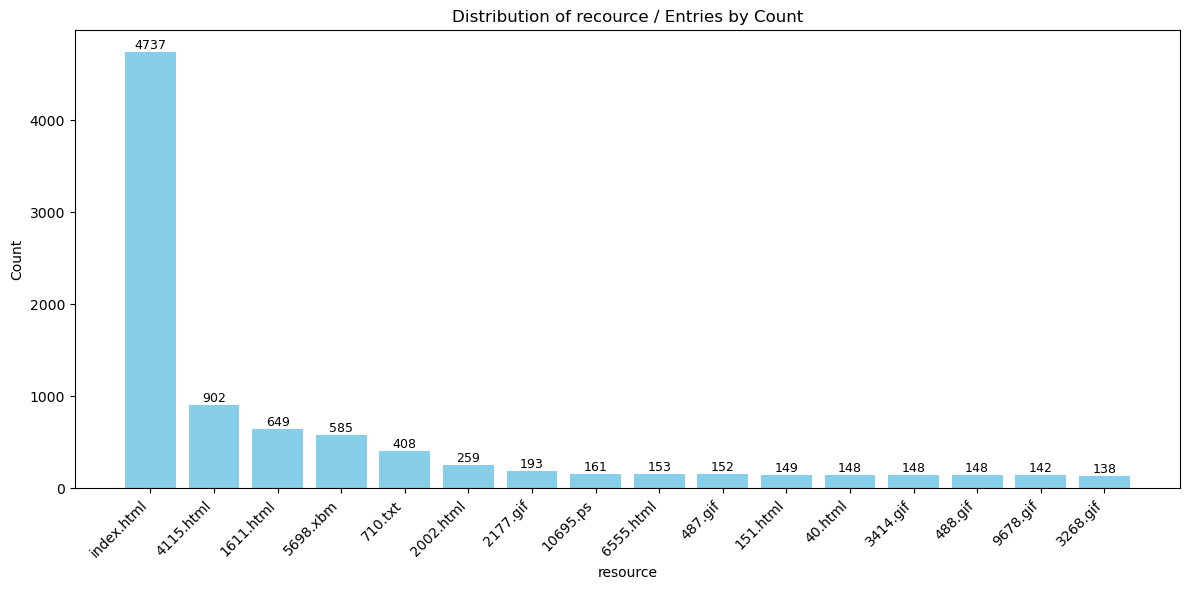

In [193]:
import matplotlib.pyplot as plt

df_1 = pd.DataFrame(result_df)
df_1['resource'] = df_1['resource'].replace('', 'Unknown')

plt.figure(figsize=(12, 6))
bars = plt.bar(df_1['resource'], df_1['count'], color='skyblue')
plt.xlabel('resource')
plt.ylabel('Count')
plt.title('Distribution of recource / Entries by Count')
plt.xticks(rotation=45, ha='right')


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height}', 
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


# Q6: Top 15 file extensions with 404 responses

In [123]:

df_404 = df[df['status'] == 404].copy()
df_404['extension'] = (
    df_404['resource']
    .str.split('?').str[0]            
    .str.extract(r'\.([a-zA-Z0-9]+)$') 
)


df_404['extension'] = df_404['extension'].str.lower()


df_404 = df_404.dropna(subset=['extension'])

top_extensions = (
    df_404.groupby('extension')
    .size()
    .sort_values(ascending=False)
    .head(15)
    .reset_index(name='count')
)


result_1 = list(top_extensions.itertuples(index=False, name=None))

print(result_1)


[('html', 12192), ('gif', 7340), ('xbm', 824), ('ps', 754), ('jpg', 538), ('txt', 508), ('htm', 109), ('cgi', 77), ('com', 45), ('z', 41), ('dvi', 40), ('ca', 36), ('hmtl', 30), ('util', 29), ('bmp', 28)]


In [124]:
result_df1 = top_extensions

print(result_df1)


   extension  count
0       html  12192
1        gif   7340
2        xbm    824
3         ps    754
4        jpg    538
5        txt    508
6        htm    109
7        cgi     77
8        com     45
9          z     41
10       dvi     40
11        ca     36
12      hmtl     30
13      util     29
14       bmp     28


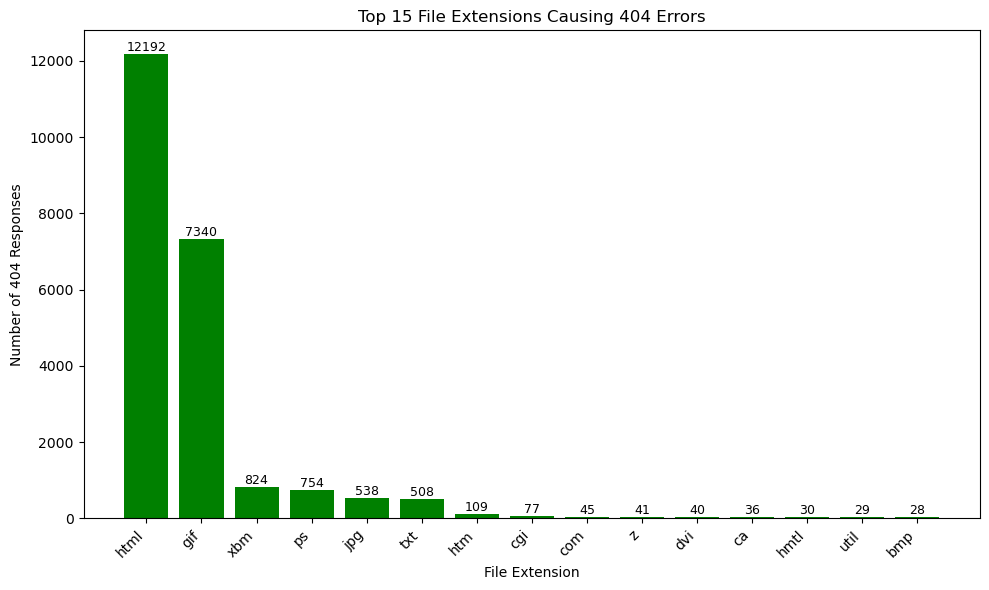

In [125]:




plt.figure(figsize=(10, 6))
bars = plt.bar(result_df1['extension'], result_df1['count'], color='Green')
plt.xlabel('File Extension')
plt.ylabel('Number of 404 Responses')
plt.title('Top 15 File Extensions Causing 404 Errors')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', 
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


# Q7: Total bandwidth transferred per day for July 1995

In [126]:
df['size'] = pd.to_numeric(df['size'], errors='coerce')
df = df.dropna(subset=['size'])

daily_size_sum = df.groupby('date_only')['size'].sum()

print(daily_size_sum)


date_only
01-01-1995     6676197
01-02-1995    28127998
01-03-1995    43366536
01-04-1995    13585413
01-05-1995    14989201
                ...   
31-05-1995    26746675
31-07-1995    30729809
31-08-1995    26999355
31-10-1994    78425927
31-12-1994     7155127
Name: size, Length: 353, dtype: Int64


In [127]:
daily_size_sum_df = daily_size_sum.reset_index() 
daily_size_sum_df.columns = ['Date', 'Total_Bandwidth_Bytes']
daily_size_sum_df

,Date,Total_Bandwidth_Bytes
0,01-01-1995,6676197
1,01-02-1995,28127998
2,01-03-1995,43366536
3,01-04-1995,13585413
4,01-05-1995,14989201
...,...,...
348,31-05-1995,26746675
349,31-07-1995,30729809
350,31-08-1995,26999355
351,31-10-1994,78425927


In [128]:

july_1995_df = daily_size_sum_df[daily_size_sum_df['Date'].str.contains('07-1995')]

print(july_1995_df)


           Date  Total_Bandwidth_Bytes
6    01-07-1995               11333976
18   02-07-1995                8656012
30   03-07-1995               13596612
42   04-07-1995               26573988
54   05-07-1995               19541225
66   06-07-1995               19755015
78   07-07-1995                9427822
90   08-07-1995                5403491
102  09-07-1995                4660556
114  10-07-1995               14789702
126  11-07-1995               22503471
138  12-07-1995               17308034
149  13-07-1995               15988328
160  14-07-1995               19186430
171  15-07-1995               15773233
182  16-07-1995                9005564
193  17-07-1995               19601338
204  18-07-1995               17098855
215  19-07-1995               17792694
226  20-07-1995               20751717
237  21-07-1995               25455607
248  22-07-1995                8066660
259  23-07-1995                9593870
270  24-07-1995               22308265
282  25-07-1995          

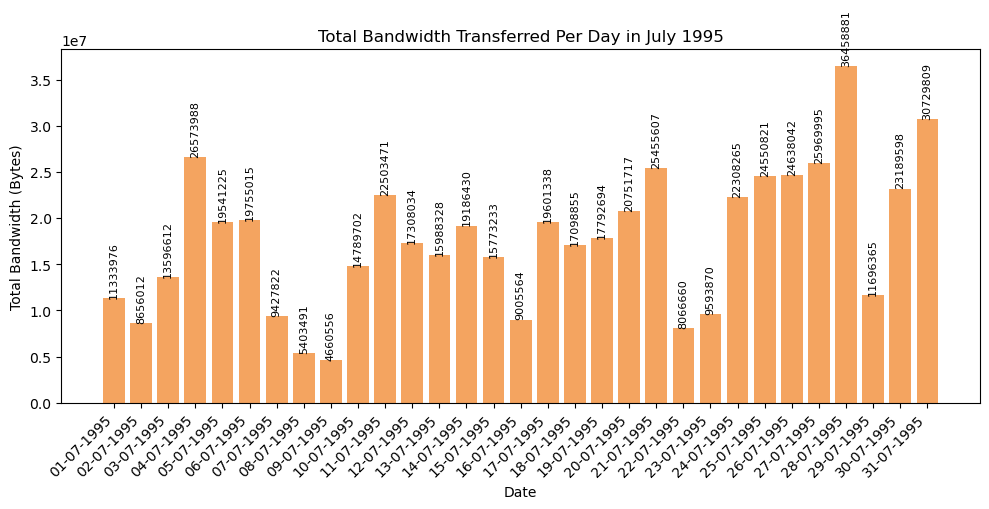

In [195]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
bars = plt.bar(july_1995_df['Date'], july_1995_df['Total_Bandwidth_Bytes'], color='sandybrown')

plt.title('Total Bandwidth Transferred Per Day in July 1995')
plt.xlabel('Date')
plt.ylabel('Total Bandwidth (Bytes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,                           
        f'{int(height)}',                 
        ha='center',
        va='bottom',
        fontsize=8,
        rotation=90                       
    )

plt.show()


#  Q8: Hourly request distribution

In [130]:
df['time_only'] = df['date'].dt.strftime('%H:%M:%S')


In [131]:
df

,host,date,method,resource,protocol,status,size,date_only,time_only
0,local,1994-10-24 13:41:41,GET,index.html,HTTP/1.0,200,150,24-10-1994,13:41:41
1,local,1994-10-24 13:41:41,GET,1.gif,HTTP/1.0,200,1210,24-10-1994,13:41:41
2,local,1994-10-24 13:43:13,GET,index.html,HTTP/1.0,200,3185,24-10-1994,13:43:13
3,local,1994-10-24 13:43:14,GET,2.gif,HTTP/1.0,200,2555,24-10-1994,13:43:14
4,local,1994-10-24 13:43:15,GET,3.gif,HTTP/1.0,200,36403,24-10-1994,13:43:15
...,...,...,...,...,...,...,...,...,...
723995,local,1995-10-11 14:11:39,GET,2.gif,HTTP/1.0,200,2555,11-10-1995,14:11:39
723996,local,1995-10-11 14:11:40,GET,3.gif,HTTP/1.0,200,36403,11-10-1995,14:11:40
723997,local,1995-10-11 14:11:45,GET,11459.html,HTTP/1.0,404,0,11-10-1995,14:11:45
723998,local,1995-10-11 14:11:58,GET,11459.html,HTTP/1.0,404,0,11-10-1995,14:11:58


In [152]:

df

,host,date,method,resource,protocol,status,size,date_only,time_only
0,local,1994-10-24 13:41:41,GET,index.html,HTTP/1.0,200,150,24-10-1994,13:41:41
1,local,1994-10-24 13:41:41,GET,1.gif,HTTP/1.0,200,1210,24-10-1994,13:41:41
2,local,1994-10-24 13:43:13,GET,index.html,HTTP/1.0,200,3185,24-10-1994,13:43:13
3,local,1994-10-24 13:43:14,GET,2.gif,HTTP/1.0,200,2555,24-10-1994,13:43:14
4,local,1994-10-24 13:43:15,GET,3.gif,HTTP/1.0,200,36403,24-10-1994,13:43:15
...,...,...,...,...,...,...,...,...,...
723995,local,1995-10-11 14:11:39,GET,2.gif,HTTP/1.0,200,2555,11-10-1995,14:11:39
723996,local,1995-10-11 14:11:40,GET,3.gif,HTTP/1.0,200,36403,11-10-1995,14:11:40
723997,local,1995-10-11 14:11:45,GET,11459.html,HTTP/1.0,404,0,11-10-1995,14:11:45
723998,local,1995-10-11 14:11:58,GET,11459.html,HTTP/1.0,404,0,11-10-1995,14:11:58


In [161]:
df['hour_only'] = df['time_only'].str.split(':').str[0]


In [162]:
df

,host,date,method,resource,protocol,status,size,date_only,time_only,hour_only
0,local,1994-10-24 13:41:41,GET,index.html,HTTP/1.0,200,150,24-10-1994,13:41:41,13
1,local,1994-10-24 13:41:41,GET,1.gif,HTTP/1.0,200,1210,24-10-1994,13:41:41,13
2,local,1994-10-24 13:43:13,GET,index.html,HTTP/1.0,200,3185,24-10-1994,13:43:13,13
3,local,1994-10-24 13:43:14,GET,2.gif,HTTP/1.0,200,2555,24-10-1994,13:43:14,13
4,local,1994-10-24 13:43:15,GET,3.gif,HTTP/1.0,200,36403,24-10-1994,13:43:15,13
...,...,...,...,...,...,...,...,...,...,...
723995,local,1995-10-11 14:11:39,GET,2.gif,HTTP/1.0,200,2555,11-10-1995,14:11:39,14
723996,local,1995-10-11 14:11:40,GET,3.gif,HTTP/1.0,200,36403,11-10-1995,14:11:40,14
723997,local,1995-10-11 14:11:45,GET,11459.html,HTTP/1.0,404,0,11-10-1995,14:11:45,14
723998,local,1995-10-11 14:11:58,GET,11459.html,HTTP/1.0,404,0,11-10-1995,14:11:58,14


In [165]:

df_filtered = df[df['protocol'].str.contains('HTTP', case=False, na=False)].copy()


print(df_filtered)


         host                date method    resource  protocol  status   size  \
0       local 1994-10-24 13:41:41    GET  index.html  HTTP/1.0     200    150   
1       local 1994-10-24 13:41:41    GET       1.gif  HTTP/1.0     200   1210   
2       local 1994-10-24 13:43:13    GET  index.html  HTTP/1.0     200   3185   
3       local 1994-10-24 13:43:14    GET       2.gif  HTTP/1.0     200   2555   
4       local 1994-10-24 13:43:15    GET       3.gif  HTTP/1.0     200  36403   
...       ...                 ...    ...         ...       ...     ...    ...   
723995  local 1995-10-11 14:11:39    GET       2.gif  HTTP/1.0     200   2555   
723996  local 1995-10-11 14:11:40    GET       3.gif  HTTP/1.0     200  36403   
723997  local 1995-10-11 14:11:45    GET  11459.html  HTTP/1.0     404      0   
723998  local 1995-10-11 14:11:58    GET  11459.html  HTTP/1.0     404      0   
723999  local 1995-10-11 14:14:17    GET  index.html  HTTP/1.0     304      0   

         date_only time_onl

In [166]:

hourly_counts = df.groupby('hour_only').size()


hourly_counts = hourly_counts.sort_index()

result_dict = hourly_counts.to_dict()

print(result_dict)


{'00': 18701, '01': 14372, '02': 12681, '03': 10895, '04': 9963, '05': 10787, '06': 13047, '07': 16659, '08': 26554, '09': 33967, '10': 43346, '11': 47554, '12': 46768, '13': 51404, '14': 54482, '15': 50269, '16': 51138, '17': 45047, '18': 33143, '19': 30546, '20': 29675, '21': 27384, '22': 23812, '23': 21806}


In [167]:
df_result = pd.DataFrame(list(result_dict.items()), columns=['hour_only', 'request_count'])

print(df_result)

   hour_only  request_count
0         00          18701
1         01          14372
2         02          12681
3         03          10895
4         04           9963
5         05          10787
6         06          13047
7         07          16659
8         08          26554
9         09          33967
10        10          43346
11        11          47554
12        12          46768
13        13          51404
14        14          54482
15        15          50269
16        16          51138
17        17          45047
18        18          33143
19        19          30546
20        20          29675
21        21          27384
22        22          23812
23        23          21806


   hour_only  request_count
0         00          18701
1         01          14372
2         02          12681
3         03          10895
4         04           9963
5         05          10787
6         06          13047
7         07          16659
8         08          26554
9         09          33967
10        10          43346
11        11          47554
12        12          46768
13        13          51404
14        14          54482
15        15          50269
16        16          51138
17        17          45047
18        18          33143
19        19          30546
20        20          29675
21        21          27384
22        22          23812
23        23          21806


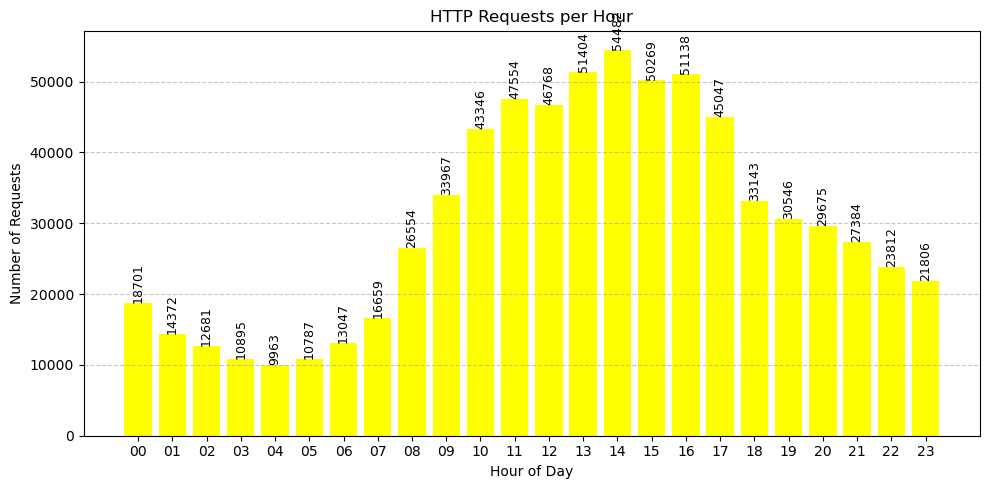

In [196]:
import matplotlib.pyplot as plt


print(df_result)

plt.figure(figsize=(10,5))
bars = plt.bar(df_result['hour_only'], df_result['request_count'], color='yellow')

plt.title('HTTP Requests per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Requests')
plt.xticks(range(0, 24))  
plt.grid(axis='y', linestyle='--', alpha=0.7)


for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height, 
        f'{int(height)}', 
        ha='center', 
        va='bottom', 
        fontsize=9,
        rotation=90  
    )

plt.tight_layout()
plt.show()


# Q9: Top 10 most requested filenames

In [173]:

df['filename'] = df['resource'].str.split('/').str[-1]


top_10_files = df['filename'].value_counts().head(10)


top_10_list = list(top_10_files.items())

print(top_10_list)


[('index.html', 140076), ('3.gif', 24006), ('2.gif', 23606), ('4.gif', 8018), ('244.gif', 5149), ('5.html', 5010), ('4097.gif', 4874), ('8870.jpg', 4493), ('6733.gif', 4278), ('8472.gif', 3843)]


In [174]:


top_10_df = pd.DataFrame(top_10_list, columns=['filename', 'request_count'])

print(top_10_df)


     filename  request_count
0  index.html         140076
1       3.gif          24006
2       2.gif          23606
3       4.gif           8018
4     244.gif           5149
5      5.html           5010
6    4097.gif           4874
7    8870.jpg           4493
8    6733.gif           4278
9    8472.gif           3843


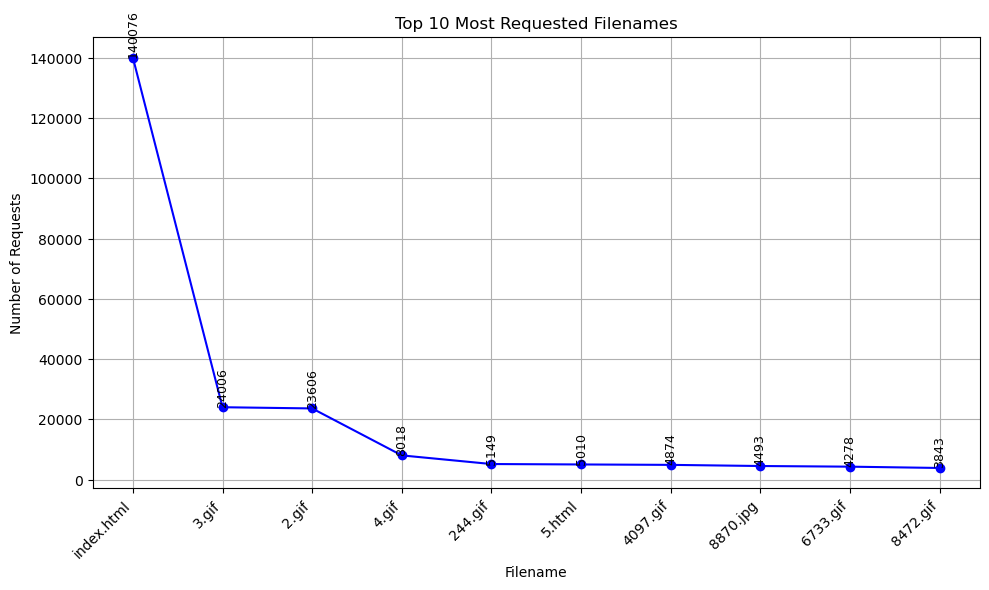

In [197]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot line with markers
plt.plot(top_10_df['filename'], top_10_df['request_count'], marker='o', linestyle='-', color='blue')

plt.title('Top 10 Most Requested Filenames')
plt.xlabel('Filename')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45, ha='right') 
plt.grid(True)


for i, row in top_10_df.iterrows():
    plt.text(
        row['filename'], 
        row['request_count'], 
        str(row['request_count']), 
        ha='center', 
        va='bottom', 
        fontsize=9, 
        rotation=90  
    )

plt.tight_layout()
plt.show()


# Q10: HTTP response code distribution

In [177]:
df

,host,date,method,resource,protocol,status,size,date_only,time_only,hour_only,filename
0,local,1994-10-24 13:41:41,GET,index.html,HTTP/1.0,200,150,24-10-1994,13:41:41,13,index.html
1,local,1994-10-24 13:41:41,GET,1.gif,HTTP/1.0,200,1210,24-10-1994,13:41:41,13,1.gif
2,local,1994-10-24 13:43:13,GET,index.html,HTTP/1.0,200,3185,24-10-1994,13:43:13,13,index.html
3,local,1994-10-24 13:43:14,GET,2.gif,HTTP/1.0,200,2555,24-10-1994,13:43:14,13,2.gif
4,local,1994-10-24 13:43:15,GET,3.gif,HTTP/1.0,200,36403,24-10-1994,13:43:15,13,3.gif
...,...,...,...,...,...,...,...,...,...,...,...
723995,local,1995-10-11 14:11:39,GET,2.gif,HTTP/1.0,200,2555,11-10-1995,14:11:39,14,2.gif
723996,local,1995-10-11 14:11:40,GET,3.gif,HTTP/1.0,200,36403,11-10-1995,14:11:40,14,3.gif
723997,local,1995-10-11 14:11:45,GET,11459.html,HTTP/1.0,404,0,11-10-1995,14:11:45,14,11459.html
723998,local,1995-10-11 14:11:58,GET,11459.html,HTTP/1.0,404,0,11-10-1995,14:11:58,14,11459.html


In [179]:

http_df = df[df['protocol'].str.contains('HTTP', case=False, na=False)].copy()


status_counts = http_df['status'].value_counts().sort_index()


status_count_dict = status_counts.to_dict()

print(status_count_dict)


{200: 566845, 302: 30274, 304: 97792, 400: 13, 401: 43, 403: 4743, 404: 23486, 500: 22, 501: 43}


In [180]:
status_df = pd.DataFrame(list(status_count_dict.items()), columns=['Status_Code', 'Count'])

print(status_df)

   Status_Code   Count
0          200  566845
1          302   30274
2          304   97792
3          400      13
4          401      43
5          403    4743
6          404   23486
7          500      22
8          501      43


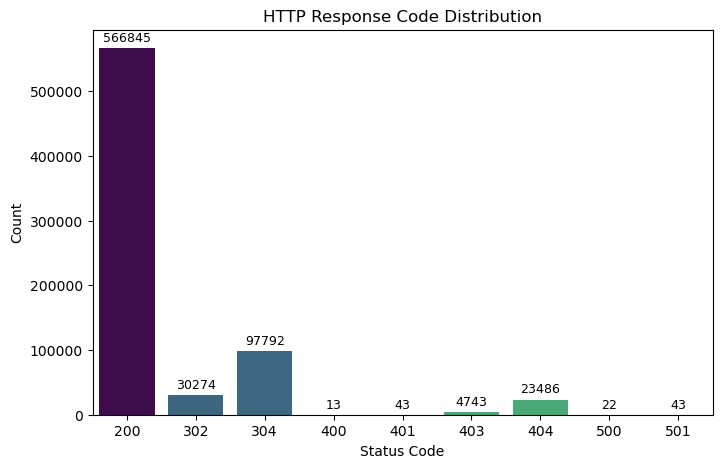

In [183]:
plt.figure(figsize=(8,5))
ax = sns.barplot(x='Status_Code', y='Count', hue='Status_Code', data=status_df, palette='viridis', dodge=False, legend=False)
plt.title('HTTP Response Code Distribution')
plt.xlabel('Status Code')
plt.ylabel('Count')


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + max(status_df['Count'])*0.01,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=9)

plt.show()


In [198]:

unique_protocols = df['protocol'].unique()

print(unique_protocols)


<StringArray>
[                                                                                                                                                                                                                 'HTTP/1.0',
                                                                                                                                                                                                                 'HTTP/V1.0',
                                                                                                                                                                                                            'tp:// HTTP/1.0',
                                                                                                                                                                                                       'Inch Nails HTTP/1.0',
                                                                                                  